# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

Attributions:
OpenWeatherMap API

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
urlx = 'api.openweathermap.org'
query_urlx = f"http://{urlx}/data/2.5/weather?appid={weather_api_key}&units=metric&q="
cityx = "Paris"
cityx_url = f'{query_urlx}{cityx}'
cityx_weather = requests.get(cityx_url).json()
cityx_weather


{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 9.82,
  'feels_like': 7.31,
  'temp_min': 7.37,
  'temp_max': 11.1,
  'pressure': 1015,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 310},
 'clouds': {'all': 20},
 'dt': 1667586719,
 'sys': {'type': 2,
  'id': 2041230,
  'country': 'FR',
  'sunrise': 1667544114,
  'sunset': 1667579183},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [22]:
# cityx_lat = cityx_weather['coord']['lat']# YOUR CODE HERE{'coord': {'lon': 2.3488, 'lat': 48.8534},
# cityx_lng = cityx_weather['coord']['lon']# YOUR CODE HERE
# cityx_max_temp = cityx_weather['main']['temp_max']
# cityx_humidity = cityx_weather['main']['humidity']
# cityx_clouds = cityx_weather['clouds']['all']
# cityx_wind = cityx_weather['wind']['speed']
# cityx_country = cityx_weather['sys']['country']
# cityx_date = cityx_weather['dt']
## NEED TO TRANSLATE DATE FROM UNIX DATETIME TO DATE

AttributeError: 'int' object has no attribute 'datetime'

In [23]:
# Set the API base URL
# YOUR CODE HERE
url = 'api.openweathermap.org'
query_url = f"http://{url}/data/2.5/weather?appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}{city}'   # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']



        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | malinyi
Processing Record 6 of Set 1 | qujing
Processing Record 7 of Set 1 | besancon
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | maningrida
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | batagay-alyta
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | jinotega
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | alyangula
Processing Record 20 of Set 1 | santiago de cao
Processing Record 21 of Set 1 | vanavara
Processing Record 22 of Set 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambon,-3.6954,128.1814,26.08,89,40,1.03,ID,1667587463
1,avarua,-21.2078,-159.7750,24.03,78,75,4.63,CK,1667587464
2,bethel,41.3712,-73.4140,22.42,57,20,4.12,US,1667587464
3,malinyi,-8.9333,36.1333,29.07,38,79,2.91,TZ,1667587464
4,qujing,25.4833,103.7833,10.44,89,100,0.93,CN,1667587465


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambon,-3.6954,128.1814,26.08,89,40,1.03,ID,1667587463
1,avarua,-21.2078,-159.7750,24.03,78,75,4.63,CK,1667587464
2,bethel,41.3712,-73.4140,22.42,57,20,4.12,US,1667587464
3,malinyi,-8.9333,36.1333,29.07,38,79,2.91,TZ,1667587464
4,qujing,25.4833,103.7833,10.44,89,100,0.93,CN,1667587465


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

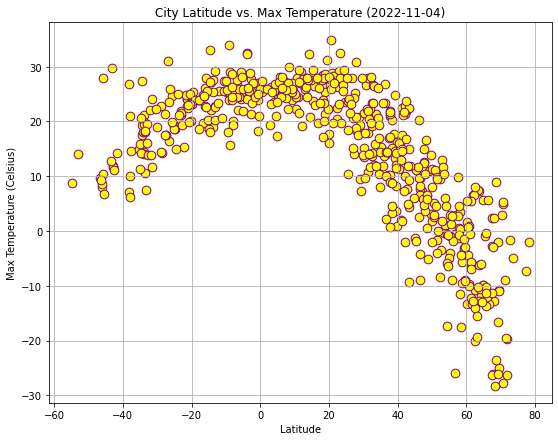

In [55]:
#My Lat vs Temp scatterplot
#  Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
xlatscatter = [city_data_df['Lat']]
ytempscatter = [city_data_df['Max Temp']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ytempscatter, marker="o", facecolors="yellow", edgecolors="purple",s =75)

# plt.xlim(-55,85)
# plt.ylim(-35,40)
plt.title("City Latitude vs. Max Temperature (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

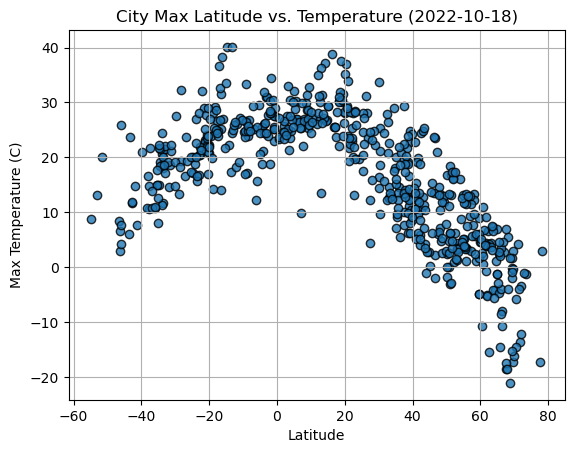

In [8]:
#Original scatterplot block for Lat vs temp
#  Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

#### Latitude Vs. Humidity

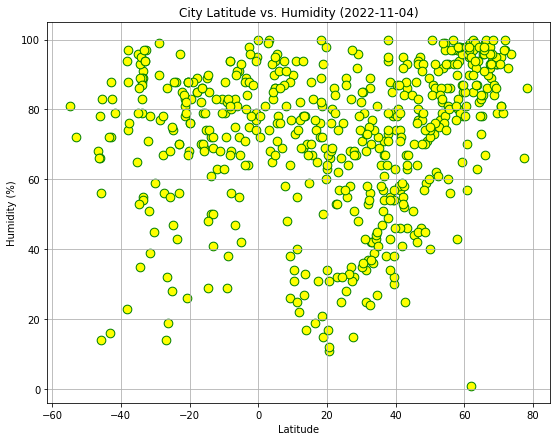

In [56]:
#My scatterplot block for Lat vs humidity
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
yhumidscatter = [city_data_df['Humidity']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, yhumidscatter, marker="o", facecolors="yellow", edgecolors="green",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Humidity (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

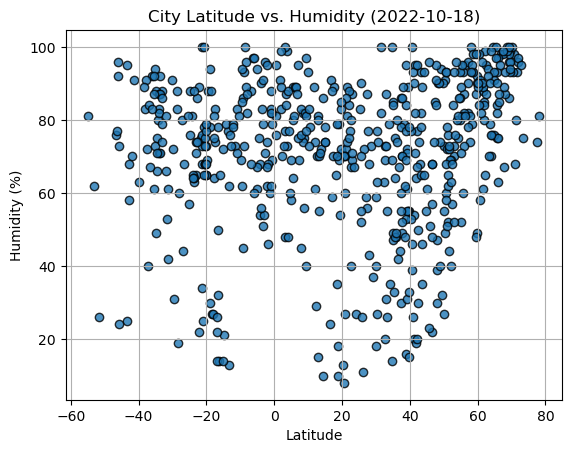

In [9]:
#Original scatterplot block for Lat vs humidity
# Build the scatter plots for latitude vs. humidity
# # YOUR CODE HERE

# # Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig2.png")

# # Show plot
# plt.show()

#### Latitude Vs. Cloudiness

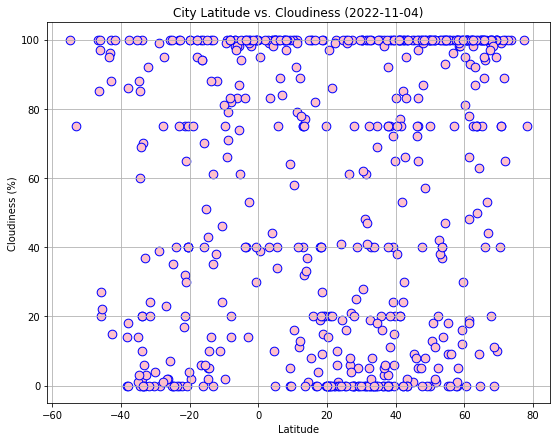

In [61]:
#my scatterplot block for Lat vs cloudiness
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
ycloudscatter = [city_data_df['Cloudiness']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ycloudscatter, marker="o", facecolors="pink", edgecolors="blue",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Cloudiness (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

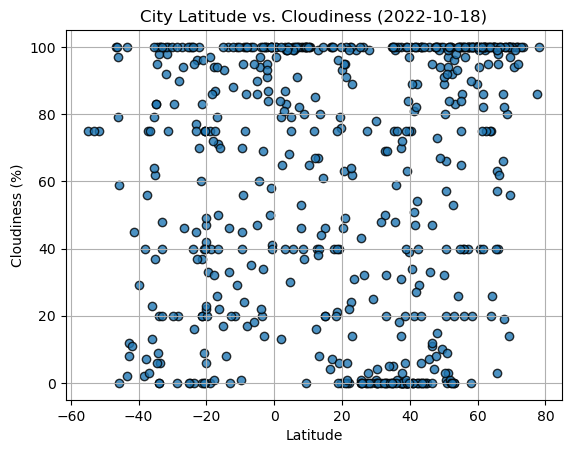

In [10]:
#Original scatterplot block for Lat vs cloudiness
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# # Show plot
# plt.show()

#### Latitude vs. Wind Speed Plot

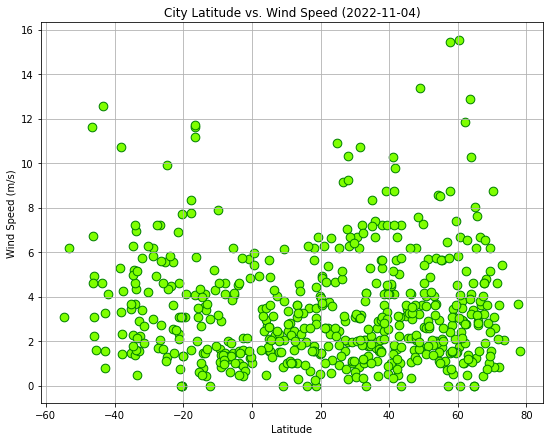

In [60]:
#My scatterplot block for Lat vs wind speed
# # Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
ywindscatter = [city_data_df['Wind Speed']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ywindscatter, marker="o", facecolors="chartreuse", edgecolors="green",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Wind Speed (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

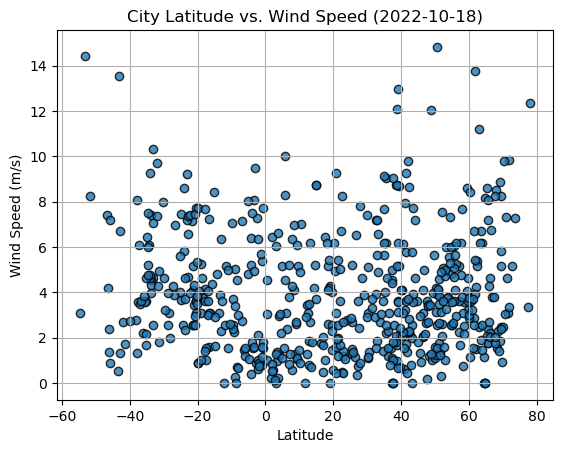

In [11]:
#Original scatterplot block for Lat vs wind speed
# # Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# # YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig4.png")

# # Show plot
# plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is -0.01


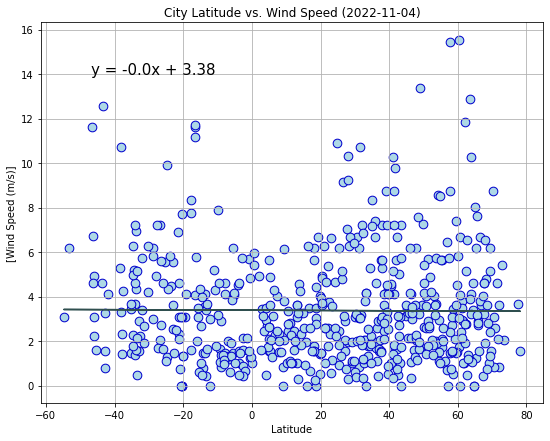

In [93]:
#My  Define a function to create Linear Regression plots
df = city_data_df
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(line_eq,(annotatex,annotatey),fontsize=15,color="black")

    plt.title(f"City Latitude vs. {yparam} (2022-11-04)")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

    # Save the figure
    figname = f'{xparam} vs {yparam}'
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [12]:
# original Define a function to create Linear Regression plots
# YOUR CODE HERE

In [72]:
#My Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,22.42,57,20,4.12,US,1667587464
4,qujing,25.4833,103.7833,10.44,89,100,0.93,CN,1667587465
5,besancon,47.2488,6.0182,7.33,95,100,1.60,FR,1667587465
7,hamilton,39.1834,-84.5333,24.86,54,40,8.75,US,1667587218
12,batagay-alyta,67.8006,130.4114,-26.09,89,20,1.89,RU,1667587467


In [13]:
#Original Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [73]:
#My Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambon,-3.6954,128.1814,26.08,89,40,1.03,ID,1667587463
1,avarua,-21.2078,-159.7750,24.03,78,75,4.63,CK,1667587464
3,malinyi,-8.9333,36.1333,29.07,38,79,2.91,TZ,1667587464
6,bluff,-46.6000,168.3333,9.76,68,100,11.61,NZ,1667587465
8,faanui,-16.4833,-151.7500,24.65,86,94,11.64,PF,1667587466


In [14]:
#Original Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [83]:
print(northern_hemi_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


The r-value is: 0.7161472181434118


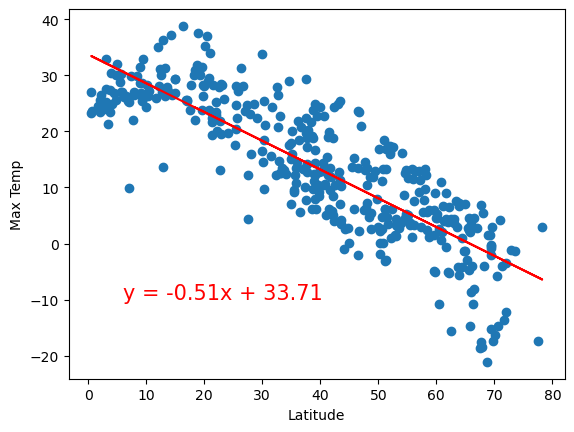

In [15]:
# Linear regression on Northern Hemisphere 
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
     
df = northern_hemi_df
xparam = 'Lat'
yparam = 'Temperature'
yunits = '(m/s)'
fcolor = 'lightblue'
ecolor = 'mediumblue'

LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

The r-value is: 0.4121057168607245


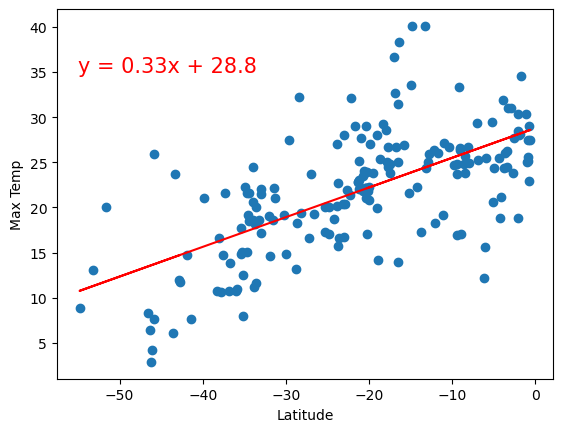

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


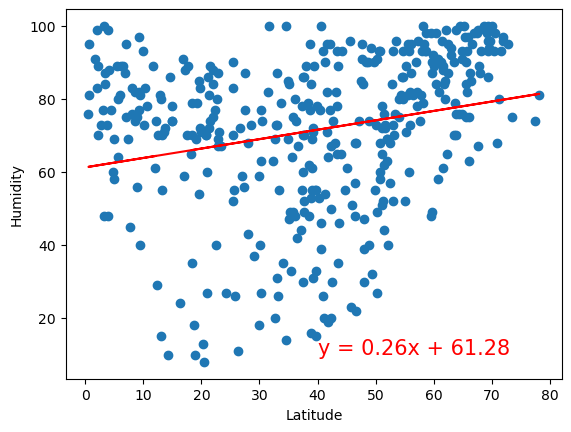

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


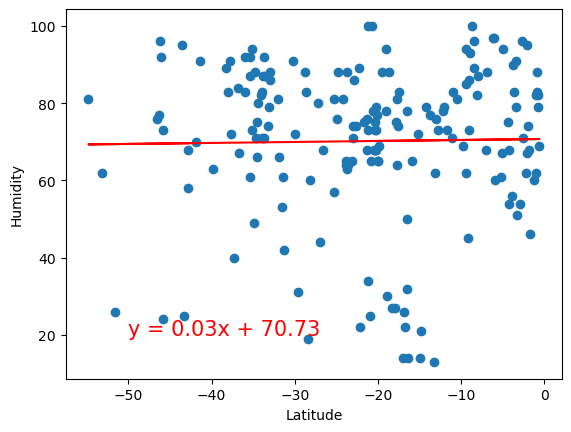

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


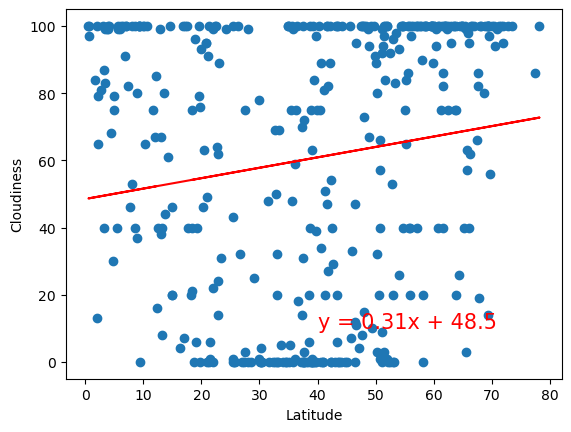

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


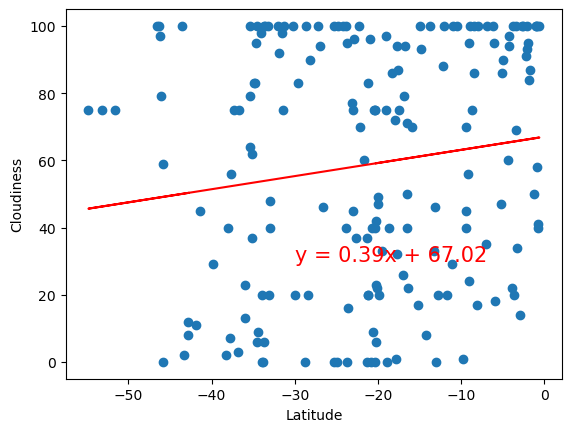

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


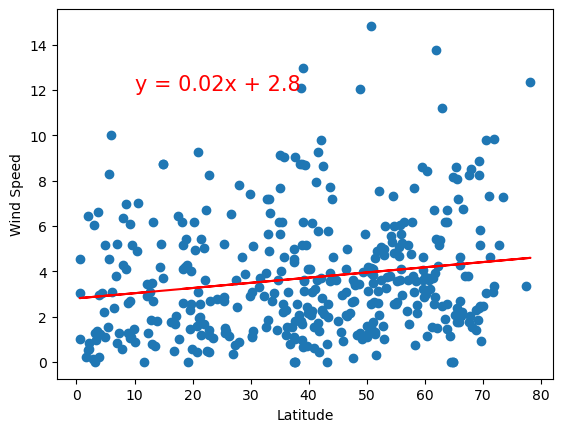

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


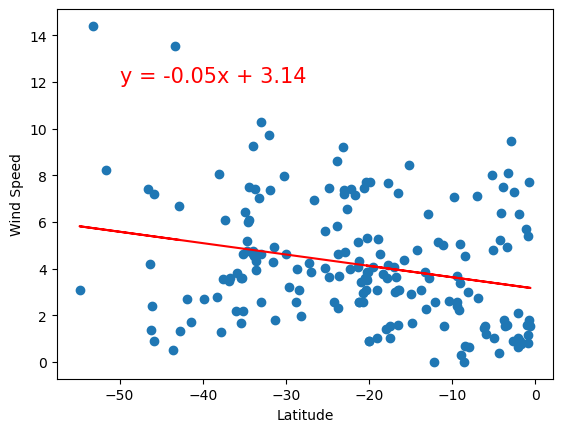

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE